In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [38]:
X, y = make_blobs(n_samples=250, centers=2, random_state=42, cluster_std=2.5)

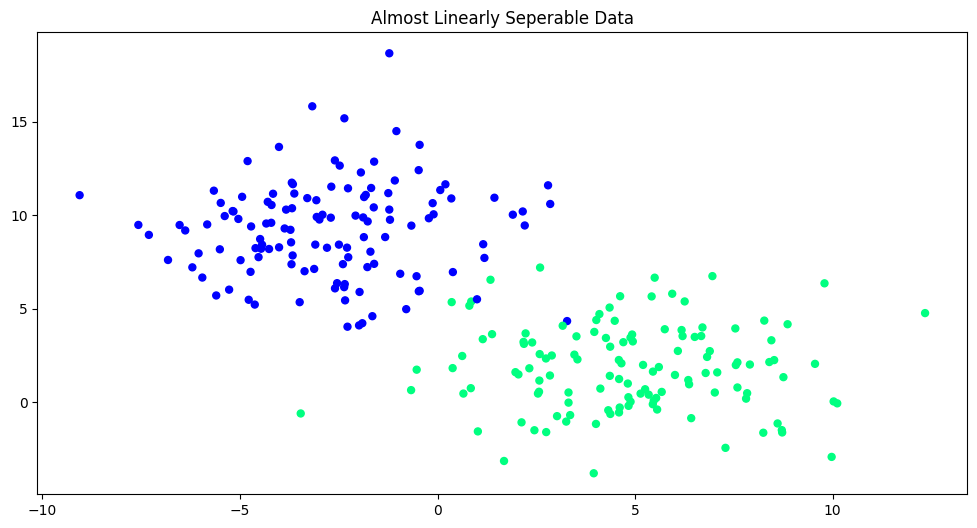

In [39]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='winter')
plt.title("Almost Linearly Seperable Data")
plt.show()

In [40]:
# Train a linear SVM with soft margins
svc = SVC(kernel='linear', C=1.0)  # Smaller C → softer margin (more tolerance)

svc.fit(X, y)

SVC(kernel='linear')

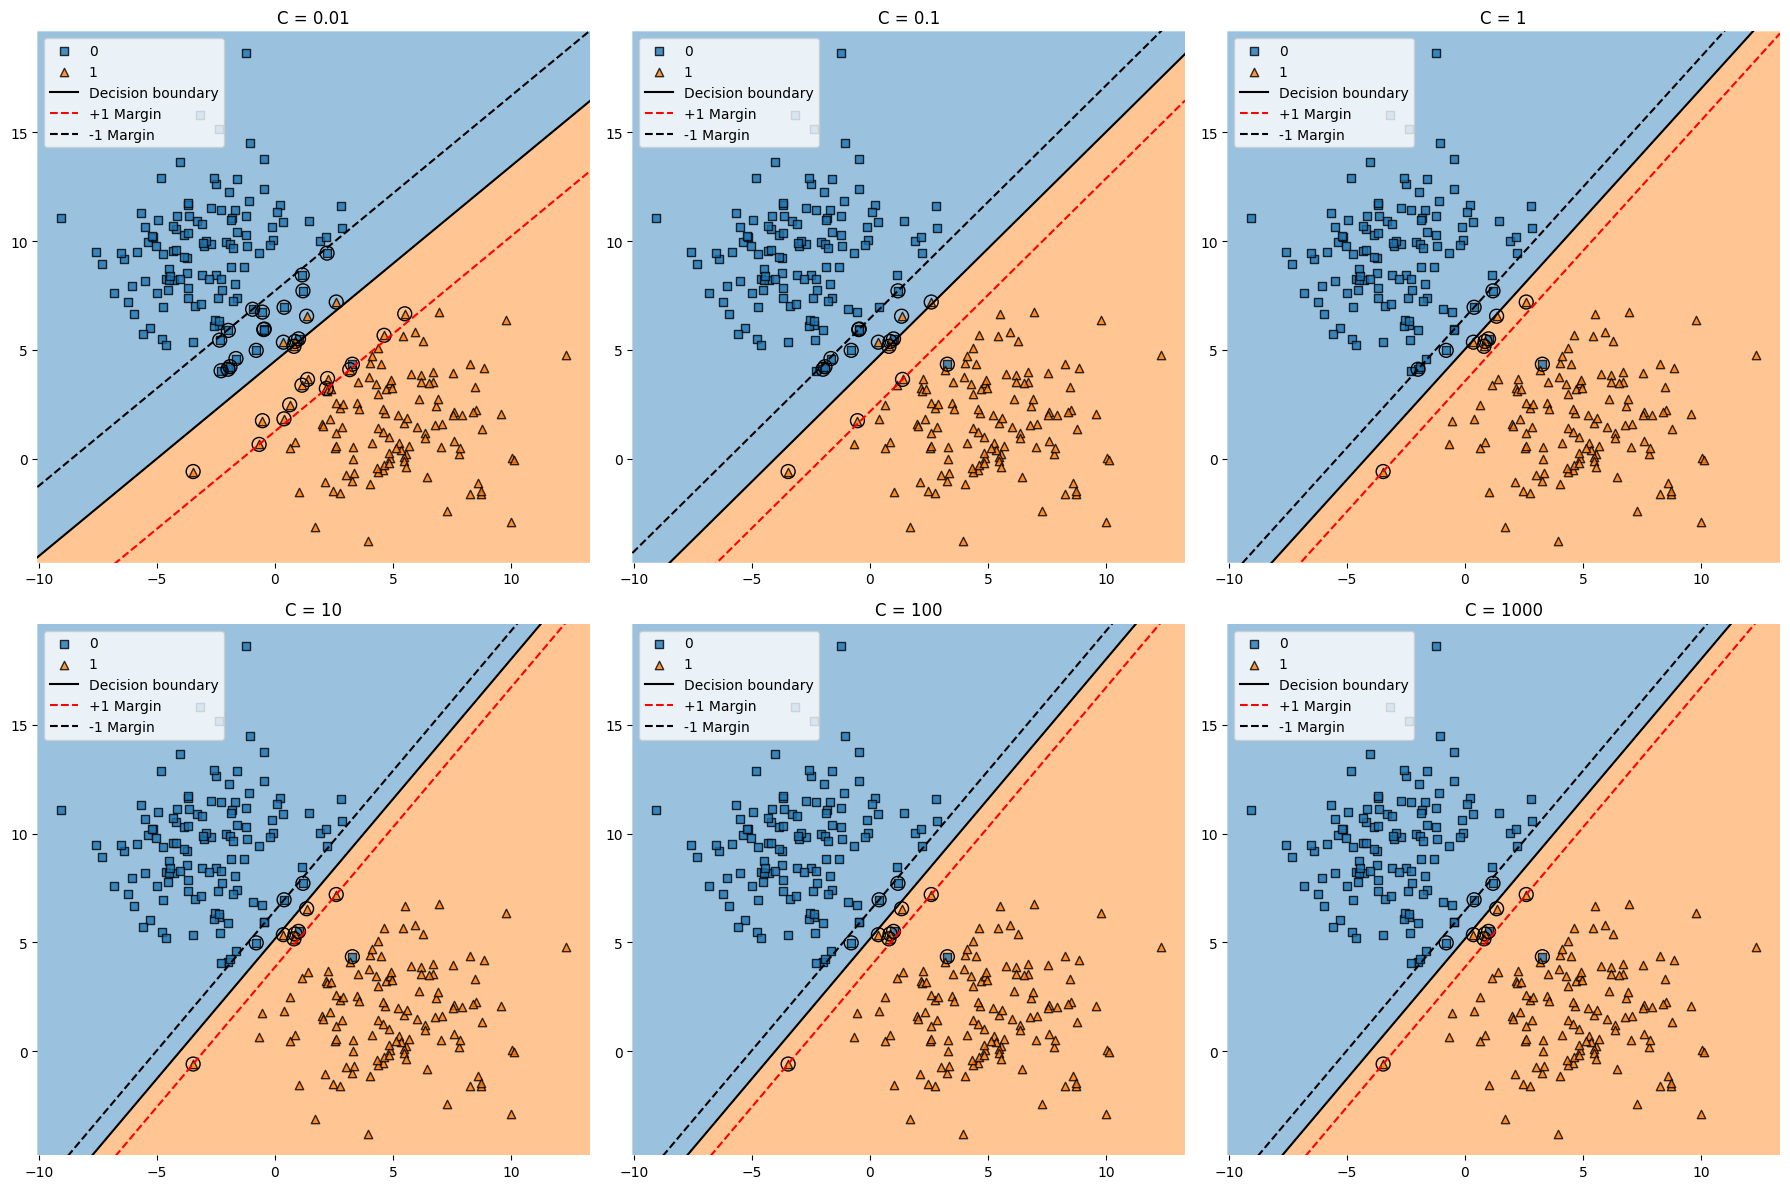

In [41]:
# Different C values to try
C_values = [0.01, 0.1, 1, 10, 100, 1000]

plt.figure(figsize=(18, 12))

for i, C in enumerate(C_values, 1):
    # Train linear SVM
    svc = SVC(kernel='linear', C=C)
    svc.fit(X, y)
    
    # Extract parameters
    w = svc.coef_[0]
    b = svc.intercept_[0]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    yy = - (w[0]*xx + b) / w[1]
    yy_margin_pos = - (w[0]*xx + b - 1) / w[1]
    yy_margin_neg = - (w[0]*xx + b + 1) / w[1]

    # Plot subplot
    plt.subplot(2, 3, i)
    plot_decision_regions(X, y, clf=svc, legend=0)
    plt.plot(xx, yy, 'k-', label='Decision boundary')
    plt.plot(xx, yy_margin_pos, 'r--', label='+1 Margin')
    plt.plot(xx, yy_margin_neg, 'k--', label='-1 Margin')
    plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.title(f"C = {C}")
    plt.legend()

plt.tight_layout()
plt.show()

| C Value       | What You’ll Observe                         | Why It Happens                                               |
|---------------|--------------------------------------------|-------------------------------------------------------------|
| **C = 0.01**  | Very wide margin, many misclassified points | SVM prioritizes margin width over correctness               |
| **C = 0.1**   | Still soft margin, but fewer misclassifications | Slightly more penalty for misclassified points             |
| **C = 1**     | Balanced margin width and accuracy          | Often a good “default”                                      |
| **C = 10**    | Narrow margin, fits data more tightly       | Model becomes more sensitive to noise                       |
| **C = 100–1000** | Almost perfectly separates data (if possible) | Overfitting risk increases — small margin, less generalization |
